Please perform the following exercises, each of which is worth $10$ points.  The instructions for most can be found at the end of the Chapter notes, however several include additional information / starter code which is provided below.

 - **Chapter 3:** Exercises 11, 12, 13, and 14
 - **Chapter 4:** Exercises 4, 5, 7, and 8
 - **Chapter 5:** Exercise 1
 - **Chapter 7:** Exercise 10, using the multi-class Perceptron instead of the multi-class Softmax cost

# Starter code for Chapter 3  Exercise 14

To implement a summable function like the following simple sum of quadratics

\begin{equation}
g\left(\mathbf{w}\right) = \sum_{p=1}^P g_p(w) = \sum_{p=1}^P\left( a^{\,}_p + b_pw + c_pw^2\right)
\end{equation}

in `Python` we can leverage the built-in [`iter` function](https://www.w3schools.com/python/ref_func_iter.asp).  This allows one to easily build such functions so that we can access each of its summands.  

Take the simple example, a function that simply sums its inputs `w` based on the indecies fed in via `iter`.

In [4]:
# sum over elements of w in iter
def sum_it(w,iter):
    final_sum = 0
    for i in iter:
        final_sum += w[i]
    return final_sum

or equivalently - removing the inner `for` loop

In [12]:
# sum over elements of w in iter
def sum_it(w,iter):
    return np.sum(w[:,iter])

So, for example we can feed in the array

In [13]:
w = np.array([1,5,2,3])[np.newaxis,:]

Note: this is a two-dimensional array with shape

In [15]:
print (w.shape)

(1, 4)


and return the sum of any of its elements we choose.  So, for example, to return the sum of all elements in the array we make the call

In [16]:
# sum over all elements in the input array
sum_it(w,(0,1,2,3))

11

Notice here that we feed in a `tuple` to indicate which indices of the array we wish to iterate over.  So, for example, to add the first and second components of the input `w` we write

In [17]:
# sum over the first and last element of the input
sum_it(w,(0,3))

4

and to sum over the first two elements of the array we likewise write

In [18]:
sum_it(w,(0,1))

6

Using `iter` we can write out the sum of quadratics expressed algebraically above as shown below.  Notice in the first line we load in a set of random coefficients that will be used in this implementation.  In other words, below implement a sum o $P=100$ random quadratics whose weights are stored in the list `coeff`.

In [3]:
# autograd wrapped numpy
from autograd import numpy as np

# import pickle data loading functionality
from sklearn.externals import joblib

# load in weights of random convex quadratics
coeffs = joblib.load('coeffs/random_quadratic_weights.pkl') 

# iter-based function for sum of quadratics
def g(w,iter):
    P = len(coeffs)
    cost = 0
    for i in iter:
        # get quadratic
        coeff = coeffs[i]
        a = coeff[0]
        b = coeff[1]
        c = coeff[2]

        # add to term
        cost += (a + b*w + c*w**2)
    return cost/P

With this implementation in hand, compare the full batch and mini-batch gradient descent methods to minimize this quadratic.  In particular, compare two epochs of the full batch method with two epochs of a run using mini-batch sizes $1$ and $10$.  In each instance, just measure the total cost function value after each epoch (or sweep through the cost function summands).

# Starter code for Chapter 5 Exercise 1

In [8]:
# import the dataset
csvname = 'datasets/student_debt_data.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:1,:]
y = data[1:,:]

Note the shape of our input/output pairs here - each datapoint lies in a single column of `data`.

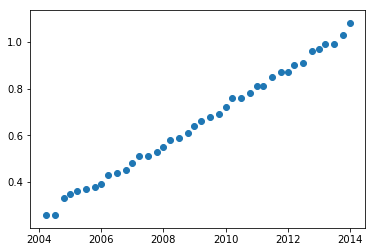

In [23]:
import matplotlib.pyplot as plt
figure = plt.figure()
plt.scatter(x,y)
plt.show()

# Starter code for Chapter 7 Exercise 10

Load in data - using `sklearn` import functionality.

In [24]:
# load in data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# strip off input / output pairs
x = mnist.data.T
y = mnist.target[np.newaxis,:]

In [25]:
print("input shape = " , x.shape)
print("output shape = ", y.shape)

input shape =  (784, 70000)
output shape =  (1, 70000)


Randomly sample input / output pairs.

In [26]:
# sample indices
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

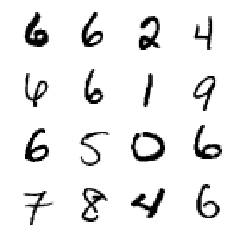

In [27]:
from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,4))
gs=GridSpec(4,10)

for i in range(0, 16):
    fig.add_subplot(gs[i%4 + int(i/4)*10])
    plt.imshow(np.max(x_sample[:,i]) - np.reshape(x_sample[:,i],(28,28)), cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.axis('off') 
plt.show()

Implementation of multi-class cost and gradient descent optimizer that takes in mini-batches.

In [28]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
def multiclass_perceptron(w,x,y,iter):
    # get subset of points
    x_p = x[:,iter]
    y_p = y[:,iter]

    # pre-compute predictions on all points
    all_evals = model(x_p,w)

    # compute maximum across data points
    a =  np.max(all_evals,axis = 0)        

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_p.astype(int).flatten(),np.arange(np.size(y_p))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y_p))

Note: this function takes in a matrix of weights, as shown below.

In [30]:
# create a matrix of weights to evaluate mult-class cost
N = x_sample.shape[0]
C = len(np.unique(y_sample))
w = 0.1*np.random.randn(N+1,C)
print (w.shape)

(785, 10)


We can evaluate the `multiclass_perceptron` function using this input matrix as shown below 

In [33]:
pts_to_evaluate = (1,10,22)
multiclass_perceptron(w,x_sample,y_sample,pts_to_evaluate)

920.4678976638857

Note: comparing a run of full-batch versus mini-batch gradient descent using this function, because it takes in a matrix you may want to *flatten* the function prior to minimizing it.  You can find instructinos about how to do this via `autograd` in the attached Jupyter notebook called `flattening_functions_using_autograd.ipynb`.